In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the cleaned application data
app_data = pd.read_csv('analyzed_application_data.csv')
# Reading the cleaned application data
pre_appdata = pd.read_csv('analyzed_previous_application_data.csv')

In [3]:
# Step 2: Split Input and Output
# Assuming 'TARGET' is the target variable
X = app_data.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = app_data['TARGET']

In [4]:
# Step 3: StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Client Profile Analysis:

In [5]:
# How do default rates vary across different demographic groups?
default_rates = app_data.groupby(['CODE_GENDER', 'NAME_EDUCATION_TYPE'])['TARGET'].mean().reset_index()
print(default_rates)

    CODE_GENDER  NAME_EDUCATION_TYPE    TARGET
0             0                    0  0.030000
1             0                    1  0.048480
2             0                    2  0.080216
3             0                    3  0.092601
4             0                    4  0.076750
5             1                    0  0.000000
6             1                    1  0.063932
7             1                    2  0.092161
8             1                    3  0.134884
9             1                    4  0.113622
10            2                    1  0.000000
11            2                    2  0.000000
12            2                    4  0.000000


In [6]:
# Are there specific educational or employment patterns associated with higher default risk?
employment_default = app_data.groupby('NAME_INCOME_TYPE')['TARGET'].mean().reset_index()
print(employment_default)

   NAME_INCOME_TYPE    TARGET
0                 0  0.000000
1                 1  0.074843
2                 2  0.400000
3                 3  0.053864
4                 4  0.057550
5                 5  0.000000
6                 6  0.363636
7                 7  0.095885


In [7]:
# Are there differences in the client profiles between those with payment difficulties and those without?
payment_difficulties = app_data[app_data['TARGET'] == 1]

no_payment_difficulties = app_data[app_data['TARGET'] == 0]


In [8]:
payment_difficulties

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,0,0,0,1,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,0,1,0,1,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,0,0,0,0,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,0,0,0,1,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,0,1,0,0,1,207000.0,450000.0,32746.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307475,456215,1,0,0,0,0,1,144000.0,1303200.0,46809.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0
307481,456225,1,0,1,0,1,0,225000.0,297000.0,19975.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
307489,456233,1,0,0,0,1,0,225000.0,521280.0,23089.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


In [9]:
no_payment_difficulties

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,0,0,0,1,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [10]:
# Calculate Income to Debt ratio
app_data['INCOME_TO_DEBT_RATIO'] = app_data['AMT_INCOME_TOTAL'] / app_data['AMT_CREDIT']


In [11]:
app_data['INCOME_TO_DEBT_RATIO']

0         0.498036
1         0.208736
2         0.500000
3         0.431748
4         0.236842
            ...   
307506    0.618375
307507    0.267112
307508    0.225776
307509    0.462029
307510    0.233333
Name: INCOME_TO_DEBT_RATIO, Length: 307511, dtype: float64

# Financial Analysis:

In [12]:
import seaborn as sns

In [13]:
# Merge the dataframes based on a common identifier, e.g., SK_ID_CURR
merged_data = pd.merge(app_data, pre_appdata, on='SK_ID_CURR', how='inner')

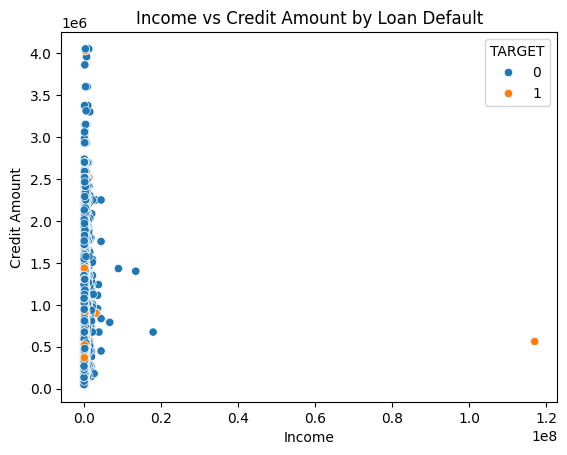

In [14]:
# Relationship between income, debt levels, and loan default probability
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', data=app_data)
plt.title('Income vs Credit Amount by Loan Default')
plt.xlabel('Income')
plt.ylabel('Credit Amount')
plt.show()

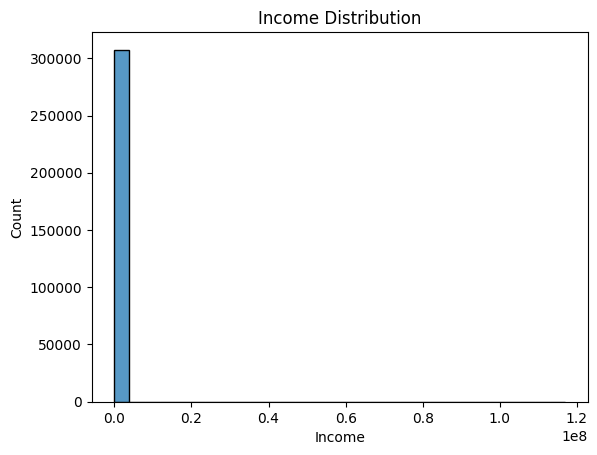

In [15]:
# Income distribution among loan applicants
sns.histplot(app_data['AMT_INCOME_TOTAL'], bins=30)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

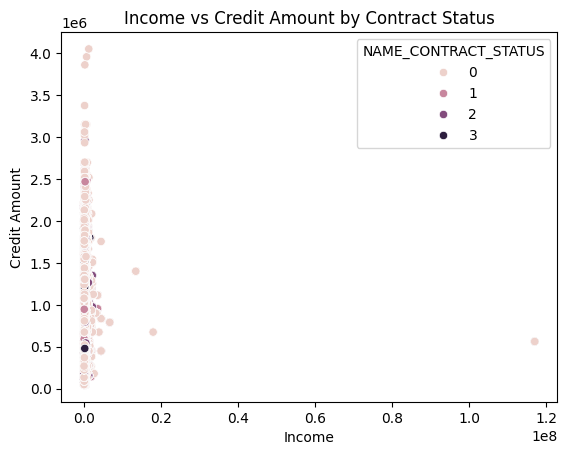

In [16]:


# Plot the scatterplot
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x', hue='NAME_CONTRACT_STATUS', data=merged_data)
plt.title('Income vs Credit Amount by Contract Status')
plt.xlabel('Income')
plt.ylabel('Credit Amount')
plt.show()

In [17]:
print(merged_data.columns)


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=159)


# Credit History Analysis

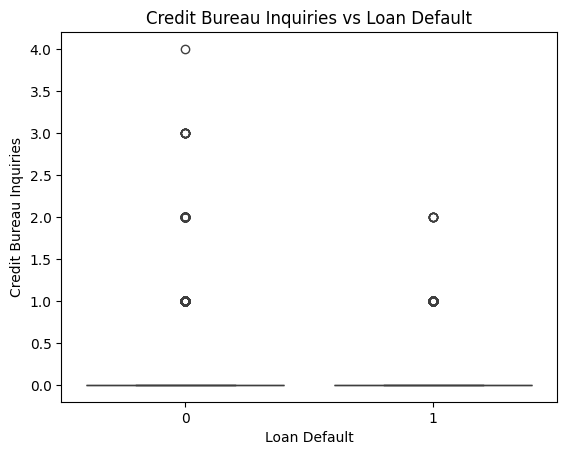

In [18]:
# Impact of number of inquiries and past defaults on creditworthiness
sns.boxplot(x='TARGET', y='AMT_REQ_CREDIT_BUREAU_HOUR', data=app_data)
plt.title('Credit Bureau Inquiries vs Loan Default')
plt.xlabel('Loan Default')
plt.ylabel('Credit Bureau Inquiries')
plt.show()

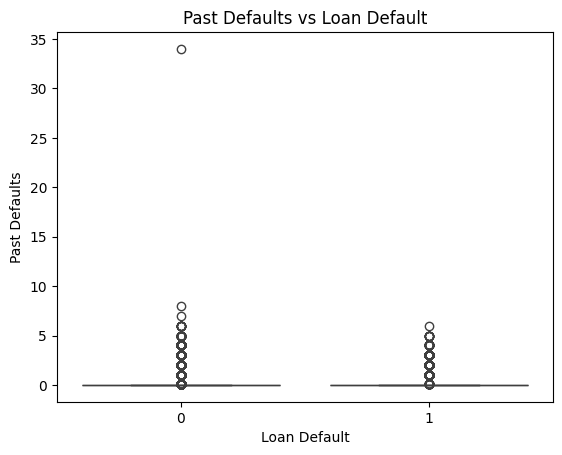

In [19]:
sns.boxplot(x='TARGET', y='DEF_30_CNT_SOCIAL_CIRCLE', data=app_data)
plt.title('Past Defaults vs Loan Default')
plt.xlabel('Loan Default')
plt.ylabel('Past Defaults')
plt.show()

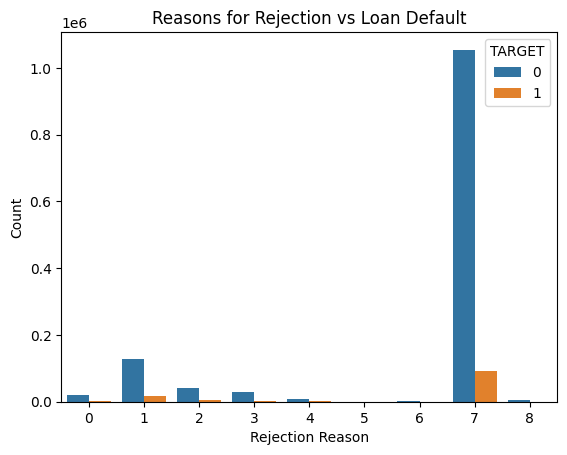

In [20]:
# Relationships between credit risk and reasons for rejection
sns.countplot(x='CODE_REJECT_REASON', hue='TARGET', data=merged_data)
plt.title('Reasons for Rejection vs Loan Default')
plt.xlabel('Rejection Reason')
plt.ylabel('Count')
plt.show()

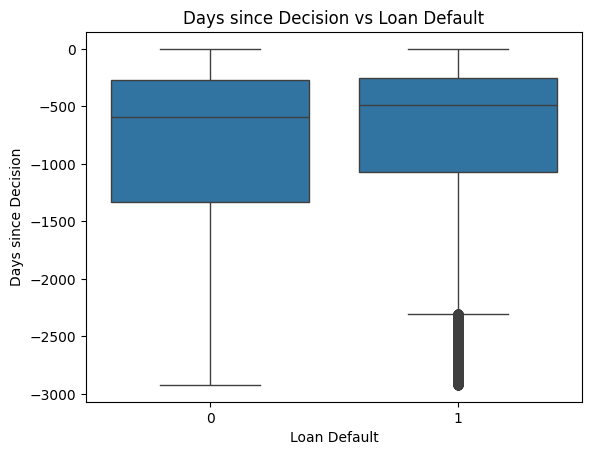

In [21]:
# Length of credit history and default risk assessment
sns.boxplot(x='TARGET', y='DAYS_DECISION', data=merged_data)
plt.title('Days since Decision vs Loan Default')
plt.xlabel('Loan Default')
plt.ylabel('Days since Decision')
plt.show()

# Loan Application Decisions Analysis

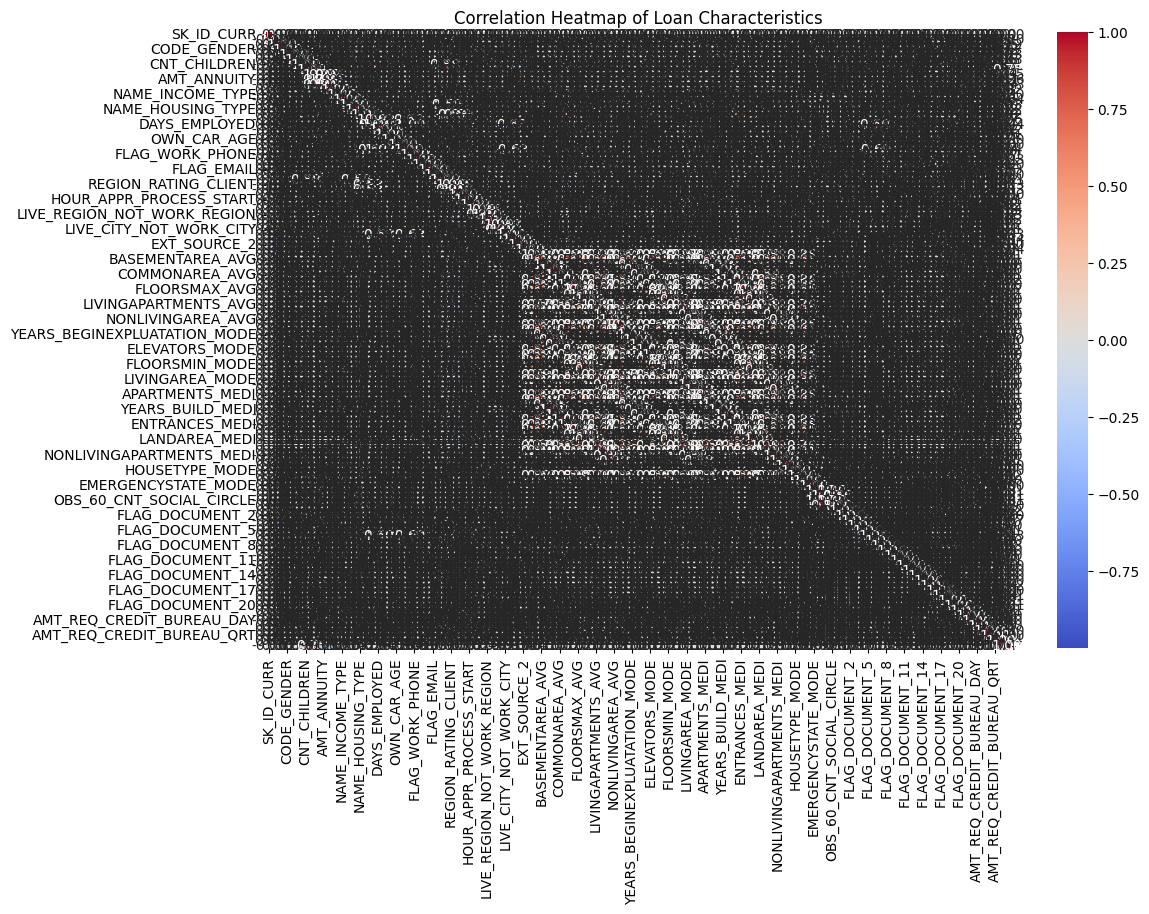

In [22]:
#Do specific loan types, amounts, or purposes correlate with higher default risk?
# Plot correlation heatmap
correlation_matrix = app_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Loan Characteristics')
plt.show()

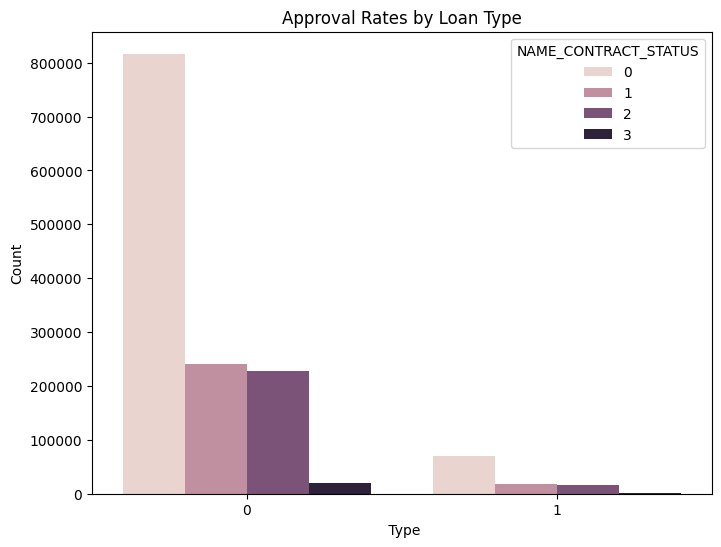

In [23]:
#Is there a difference in approval rates between different types of loans (cash vs. revolving)?
# Plot approval rates by loan type
plt.figure(figsize=(8, 6))
sns.countplot(x='NAME_CONTRACT_TYPE_x', hue='NAME_CONTRACT_STATUS', data=merged_data)
plt.title('Approval Rates by Loan Type')
plt.xlabel(' Type')
plt.ylabel('Count')
plt.show()


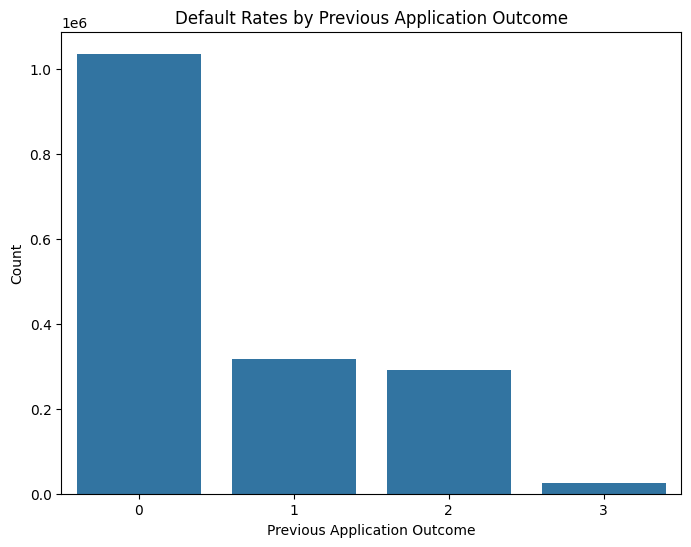

In [24]:
# How do previous application outcomes (approval, refusal) affect future default risk?
# Plot default rates by previous application outcome
plt.figure(figsize=(8, 6))
sns.countplot(x='NAME_CONTRACT_STATUS',  data=pre_appdata)
plt.title('Default Rates by Previous Application Outcome')
plt.xlabel('Previous Application Outcome')
plt.ylabel('Count')
plt.show()


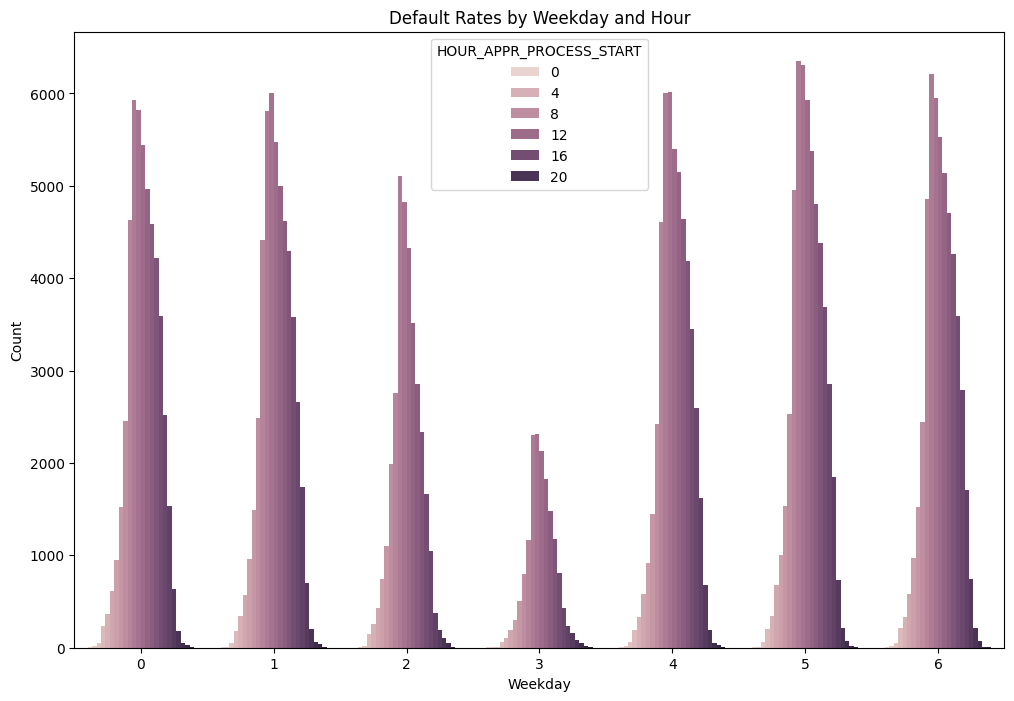

In [25]:
# Are there any correlations between the client's credit risk and the weekday or hour they applied for the loan?

# Assuming 'WEEKDAY' and 'HOUR' are columns indicating the weekday and hour of loan application

# Plot default rates by weekday and hour
plt.figure(figsize=(12, 8))
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', hue='HOUR_APPR_PROCESS_START', data=app_data)
plt.title('Default Rates by Weekday and Hour')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()



In [26]:
# Feature Importance Analysis: 

In [27]:
merged_data.isnull().sum()

SK_ID_CURR                   0
TARGET                       0
NAME_CONTRACT_TYPE_x         0
CODE_GENDER                  0
FLAG_OWN_CAR                 0
                            ..
DAYS_FIRST_DUE               0
DAYS_LAST_DUE_1ST_VERSION    0
DAYS_LAST_DUE                0
DAYS_TERMINATION             0
NFLAG_INSURED_ON_APPROVAL    0
Length: 159, dtype: int64